In [2]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df_org = pd.read_csv(r"D:\GitHub\UEL-Course\MLBA\Flask\Data\USA_Housing.csv")
df = df_org.copy()

In [4]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
print("Dataframe shape: ", df.shape)
print("-"*20)
print("Dataframe describe: ", df.describe())
print("-"*20)
print("Dataframe info: ", df.info())

Dataframe shape:  (5000, 7)
--------------------
Dataframe describe:         Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.6

<Axes: >

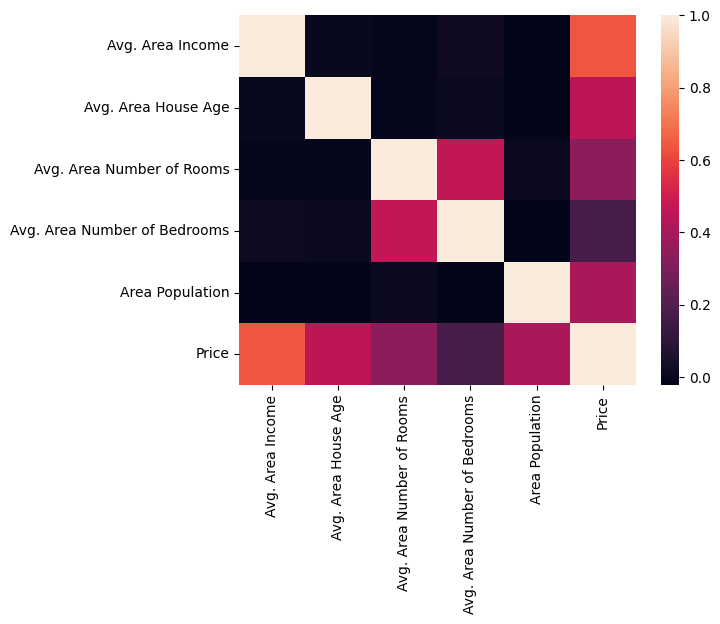

In [7]:
df_corr = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']]
sns.heatmap(df_corr.corr())

In [8]:
# Step 3: Developing a training and testing model
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [11]:
# Sẽ chauws mảng các kết quả giá nhà được dự báo
predictions = lm.predict(X_test)
predictions

array([1308587.92699759, 1237037.22949434, 1243429.34030681,
       1228900.2136037 , 1063320.9071083 , 1544058.05034861,
       1094774.70493019,  833284.72339225,  788412.85578719,
       1469714.86615709,  671728.43662062, 1606818.21977961,
       1004166.61331065, 1796798.9759592 , 1288566.96221026,
       1087782.93301076, 1423072.37492533, 1078178.68169677,
        802286.03537898,  930761.0369571 , 1134829.86477822,
        916398.42023144, 1489972.69335433, 1284580.15538816,
       1582071.35322737, 1132519.15991992, 1089888.39644517,
        974510.51872155,  924057.96820648, 1740759.72092282,
       1286481.59512311, 1621289.95171608, 1435264.2016172 ,
       1234014.77924477, 1485434.57300368, 1718335.00753702,
       1538953.74882858,  777106.64791791, 1765201.5224362 ,
       1175972.14199818, 1553707.94323485,  897703.67505179,
       1371049.80326609,  845281.72310359, 1201022.89803887,
       1133285.98450866, 1363128.14557346, 1449814.08768277,
       1574363.90467358,

In [12]:
# Nếu muốn dự báo riêng từng giá nhà ta có thể sử dụng kiểu này
prel = lm.predict([X_test.iloc[6]])
print("House Price Predict:", prel)

House Price Predict: [1094774.70493019]


c:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
# Ngoài ra cũng thể thay bằng bất cứ giá trị nào ta muốn bằng cách nhập vào mảng 2 chiều
z = X_test.iloc[[6]]
print(z)

     Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
589      53418.535312             6.334283                   8.424079   

     Avg. Area Number of Bedrooms  Area Population  
589                          4.01     33572.746968  


In [14]:
pre2 = lm.predict([[53418.535312, 6.334283, 8.424079, 4.01, 33572.746968]])
print("House Price Predict:", pre2)

House Price Predict: [1094774.71920633]


c:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
# Step 5: Evaluate the Model
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

-2635072.900933357
                                Coefficient
Avg. Area Income                  21.652206
Avg. Area House Age           164666.480722
Avg. Area Number of Rooms     119624.012232
Avg. Area Number of Bedrooms    2440.377611
Area Population                   15.270313


Coeffient cho ta thấy:
- Giả sử các thuộc tính khác không đổi, nếu Area Income tăng D đơn vị thì
giá của căn nhà sẽ được bổ sung thêm D*21.5666696
- Tương tự cho các thuộc tính khác. Như vậy dựa vào Cofficient ta biết được
mức độ ảnh hưởng của các biến độc lập lên biến phụ thuộc. Ví dụ trong
trường hợp này thì rõ ràng là tuổi thọ của căn nhà có tầm ảnh hưởng về giá
của căn nhà lớn nhất, và dân số đóng vai trò thấp nhất về sự ảnh hưởng giá.

In [16]:
from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 80879.09723489822
MSE: 10089009300.894522
RMSE: 100444.06055558746


In [17]:
# Step 6: Save the Model
import pickle
model_name = 'house_prediction_model.pkl'
pickle.dump(lm, open(model_name, 'wb'))

In [18]:
# Tái sử dụng model
model_name = 'house_prediction_model.pkl'

trained_model = pickle.load(open(model_name, 'rb'))


In [19]:
features = pd.Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population'],dtype='object')

coeff_df = pd.DataFrame(trained_model.coef_, features, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.652206
Avg. Area House Age,164666.480722
Avg. Area Number of Rooms,119624.012232
Avg. Area Number of Bedrooms,2440.377611
Area Population,15.270313


In [20]:
predictions = trained_model.predict(X_test)
predictions

array([1308587.92699759, 1237037.22949434, 1243429.34030681,
       1228900.2136037 , 1063320.9071083 , 1544058.05034861,
       1094774.70493019,  833284.72339225,  788412.85578719,
       1469714.86615709,  671728.43662062, 1606818.21977961,
       1004166.61331065, 1796798.9759592 , 1288566.96221026,
       1087782.93301076, 1423072.37492533, 1078178.68169677,
        802286.03537898,  930761.0369571 , 1134829.86477822,
        916398.42023144, 1489972.69335433, 1284580.15538816,
       1582071.35322737, 1132519.15991992, 1089888.39644517,
        974510.51872155,  924057.96820648, 1740759.72092282,
       1286481.59512311, 1621289.95171608, 1435264.2016172 ,
       1234014.77924477, 1485434.57300368, 1718335.00753702,
       1538953.74882858,  777106.64791791, 1765201.5224362 ,
       1175972.14199818, 1553707.94323485,  897703.67505179,
       1371049.80326609,  845281.72310359, 1201022.89803887,
       1133285.98450866, 1363128.14557346, 1449814.08768277,
       1574363.90467358,